In [2]:
#import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load the Pokémon JSON data
with open(r'/content/Pokemon.json', 'r') as file:
    pokemon_data = json.load(file)['pokemon']

#convert JSON data to a Pandas DataFrame
df = pd.DataFrame(pokemon_data)



In [3]:
#Data Exploration and Cleaning


#converting height and weight to float
df['height'] = df['height'].str.replace(' m', '').astype(float)
df['weight'] = df['weight'].str.replace(' kg', '').astype(float)

#basic Statistics
basic_stats = df[['height', 'weight', 'spawn_chance']].astype(float).describe()

#evolution Analysis
evolution_stats = df['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0).describe()

#weakness Analysis
weakness_stats = df['weaknesses'].apply(lambda x: len(x)).describe()

#spawn time analysis
df['spawn_time'] = df['spawn_time'].replace('NaN', np.nan)

#conversion of spawn_time to datetime
df['spawn_time'] = pd.to_datetime(df['spawn_time'], format='%H:%M', errors='coerce')

#type Comparison - 'type' column
df_expanded = df.explode('type')
type_comparison = df_expanded.groupby('type').agg({
    'height': 'mean',
    'weight': 'mean',
    'spawn_chance': 'mean'
}).reset_index()

In [4]:
#extracting all weaknesses into a single list (for loopy)
all_weaknesses = [weakness for weaknesses in df['weaknesses'] for weakness in weaknesses]
#counting occurrences of each weakness
weakness_counts = pd.Series(all_weaknesses).value_counts()
#exploding the 'type' list to create a separate row for each type
df_types = df.explode('type')
#count the occurrences of each weakness for each type
type_weakness_counts = df_types.groupby('type')['weaknesses'].apply(lambda x: pd.Series([weakness for weaknesses in x for weakness in weaknesses]).value_counts()).unstack(fill_value=0)



Text(0, 0.5, 'Number of Pokémon Spawns')

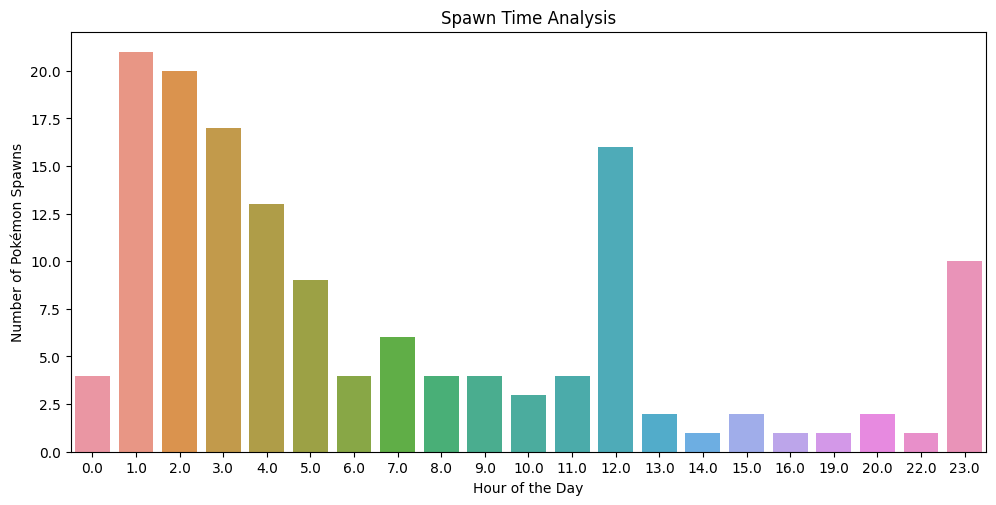

In [5]:
#Data Visualization
plt.figure(figsize=(26, 12))

#1: Spawn Time Analysis
plt.subplot(2, 2, 1)
sns.countplot(x=df['spawn_time'].dt.hour)
plt.title('Spawn Time Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pokémon Spawns')


Text(0, 0.5, 'Average Height')

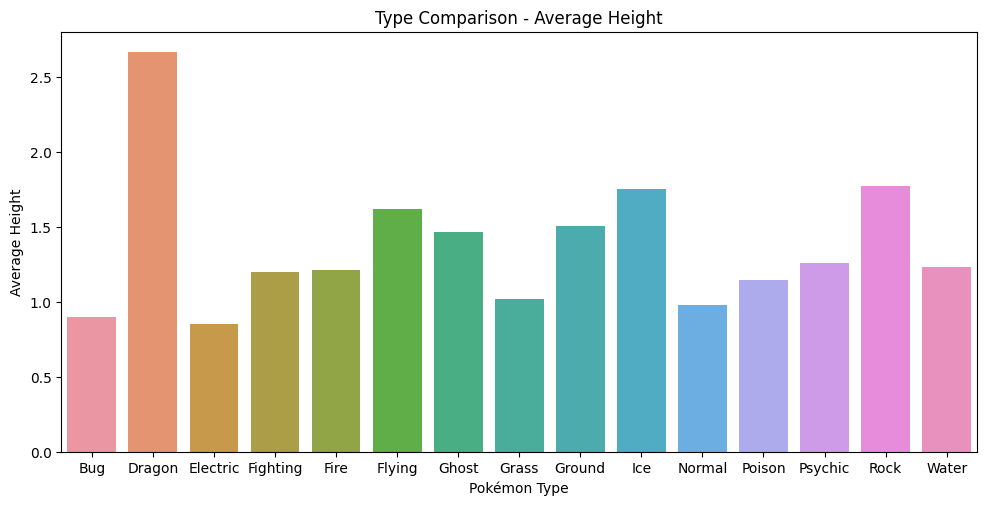

In [6]:
#2: Type Comparison - Average Height
plt.figure(figsize=(26, 12))
plt.subplot(2, 2, 3)
sns.barplot(x='type', y='height', data=type_comparison)
plt.title('Type Comparison - Average Height')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Height')

Text(0, 0.5, 'Average Weight')

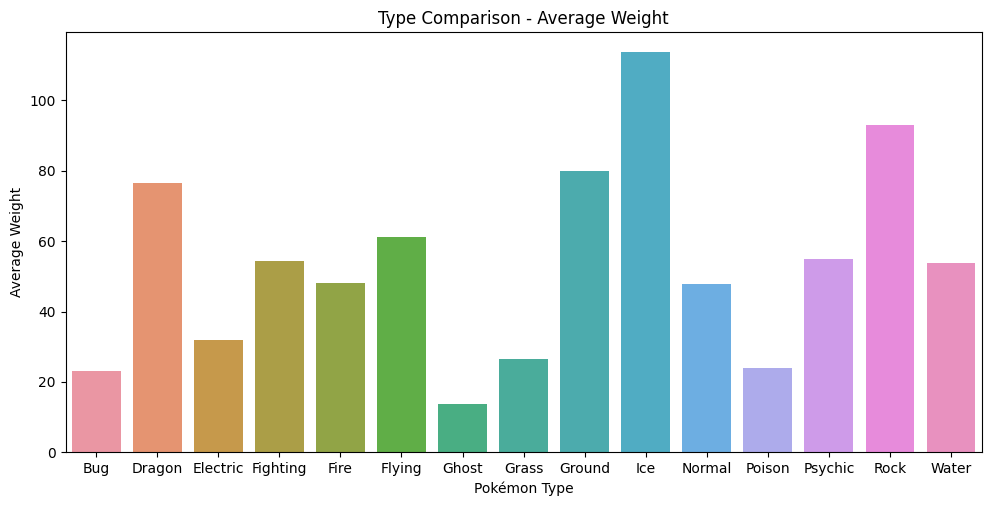

In [7]:
#2: Type Comparison - Average Weight
plt.figure(figsize=(26, 12))
plt.subplot(2, 2, 4)
sns.barplot(x='type', y='weight', data=type_comparison)
plt.title('Type Comparison - Average Weight')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Weight')

<Figure size 1400x800 with 0 Axes>

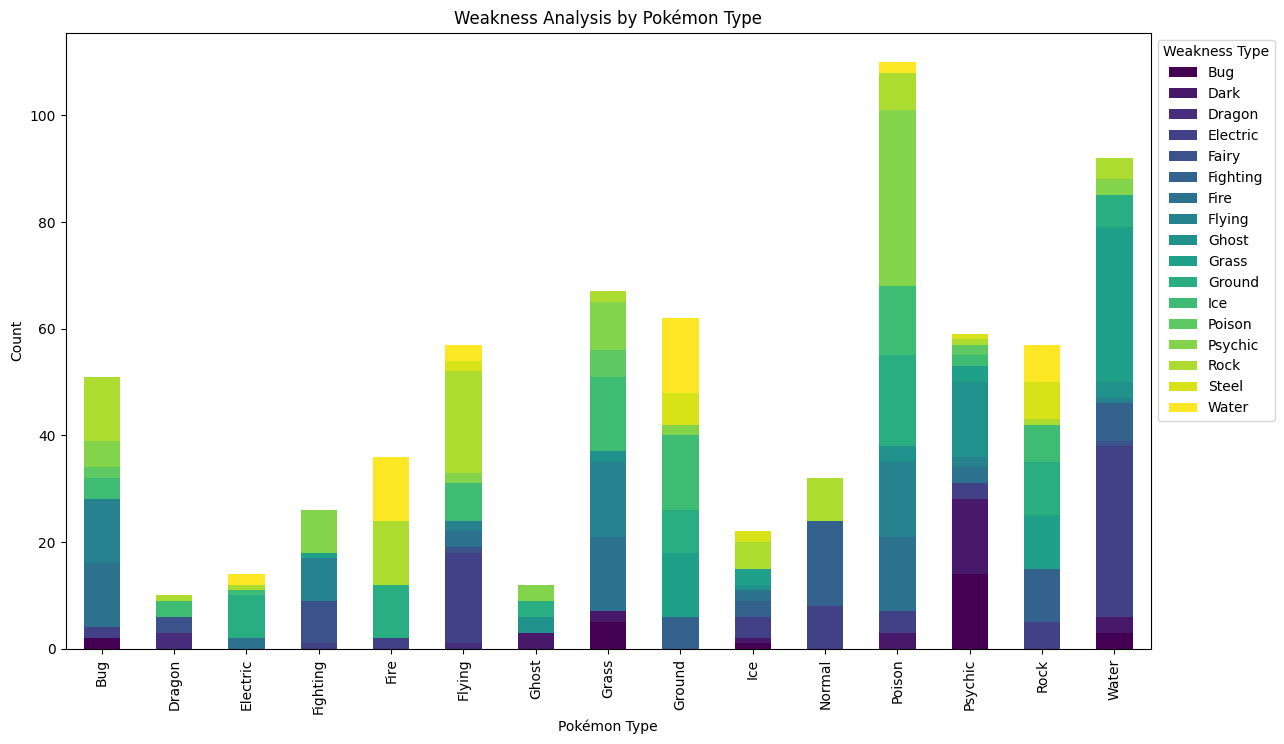

<Figure size 640x480 with 0 Axes>

In [9]:
#3: Type Comparison - Weakensses of Pokémon type
plt.figure(figsize=(14, 8))
type_weakness_counts.plot(kind='bar', stacked=True, cmap='viridis', figsize=(14, 8))
plt.title('Weakness Analysis by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.legend(title='Weakness Type', bbox_to_anchor=(1, 1))
plt.show()
plt.tight_layout()
plt.show()